# Regression in Python
Regression models performed on sample datasets using models in Python

## Simple Linear Regression
### 1. House Price vs Area

In [57]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('../data/house_price_area_only.csv')
df.head()

,Unnamed: 0,price,area
0,0,598291,1188
1,1,1744259,3512
2,2,571669,1134
3,3,493675,1940
4,4,1101539,2208


In [43]:
# Add y-intercept
x = sm.add_constant(df.area)
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6028 entries, 0 to 6027
Data columns (total 2 columns):
const    6028 non-null float64
area     6028 non-null int64
dtypes: float64(1), int64(1)
memory usage: 94.3 KB


In [45]:
mod = sm.OLS(df.price, x)

In [46]:
res = mod.fit()

In [47]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                 1.269e+04
Date:                Thu, 17 May 2018   Prob (F-statistic):               0.00
Time:                        18:34:28   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6026   BIC:                         1.691e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9587.8878   7637.479      1.255      0.209   -5384.303    2.46e+04
area         348.4664      3.093    112.662      0.000     342.403     354.530
==============================================================================
Omnibus:                      368.609   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              349.279
Skew:                           0.534   Prob(JB):                     1.43e-76
Kurtosis:                       2.499   Cond. No.                     4.93e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###  2. Carats vs. Price

In [59]:
# import data
df = pd.read_csv('../data/carats.csv', header= None)
df.columns = ['carats', 'price']
df.head()

,carats,price
0,0.17,355
1,0.16,328
2,0.17,350
3,0.18,325
4,0.25,642


In [60]:
# add y-intercept 
x = sm.add_constant(df.carats)
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
const     48 non-null float64
carats    48 non-null float64
dtypes: float64(2)
memory usage: 848.0 bytes


In [55]:
# Use OLS for linera regression model
mod = sm.OLS(df.price, x)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     2070.
Date:                Thu, 17 May 2018   Prob (F-statistic):           6.75e-40
Time:                        18:38:13   Log-Likelihood:                -233.20
No. Observations:                  48   AIC:                             470.4
Df Residuals:                      46   BIC:                             474.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -259.6259     17.319    -14.991      0.000    -294.487    -224.765
carats      3721.0249     81.786     45.497      0.000    3556.398    3885.651
==============================================================================
Omnibus:                        0.739   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.691   Jarque-Bera (JB):                0.181
Skew:                           0.056   Prob(JB):                        0.913
Kurtosis:                       3.280   Cond. No.                         18.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0,0.5,'Price($)')

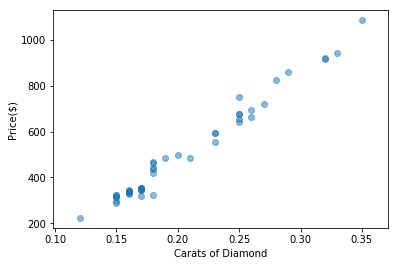

In [64]:
# scatter plot of relationship
plt.scatter(df.carats, df.price, alpha=0.5)
plt.xlabel('Carats of Diamond')
plt.ylabel('Price($)')

### Boston Housing Dataset Regression

In [71]:
from sklearn.datasets import load_boston

boston_data = load_boston()
df = pd.DataFrame()
df['MedianHomePrice'] = boston_data.target
df2 = pd.DataFrame(boston_data.data)
df['CrimePerCapita'] = df2.iloc[:,0];
df.head()

,MedianHomePrice,CrimePerCapita
0,24.0,0.00632
1,21.6,0.02731
2,34.7,0.02729
3,33.4,0.03237
4,36.2,0.06905


Fit linear model to affect of crime on median home price

In [80]:
x = sm.add_constant(df.CrimePerCapita)
mod = sm.OLS(df.MedianHomePrice, x)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        MedianHomePrice   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     88.15
Date:                Thu, 17 May 2018   Prob (F-statistic):           2.08e-19
Time:                        18:52:54   Log-Likelihood:                -1799.5
No. Observations:                 506   AIC:                             3603.
Df Residuals:                     504   BIC:                             3611.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             24.0162      0.409     58.676      0.000      23.212      24.820
CrimePerCapita    -0.4128      0.044     -9.389      0.000      -0.499      -0.326
==============================================================================
Omnibus:                      138.965   Durbin-Watson:                   0.712
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              292.343
Skew:                           1.483   Prob(JB):                     3.30e-64
Kurtosis:                       5.251   Cond. No.                         10.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0,0.5,'Median Home Price ($1000)')

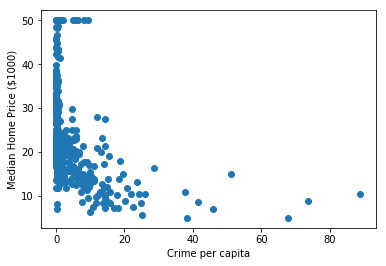

In [81]:
# plot relationship
plt.scatter(df.CrimePerCapita, df.MedianHomePrice)
plt.xlabel('Crime per capita')
plt.ylabel('Median Home Price ($1000)')